<a href="https://colab.research.google.com/github/jnsoliveira/Atividades/blob/main/AtividadeTrilha2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **COLETA E ARMAZENAMENTO DE DADOS**

**Atividade - Trilha 2**

Testar a técnica de Web Scraping utilizando a Biblioteca Beautifulsoap rodando em um notebook Python.

Implementar o tutorial disponível no artigo para coletar dados sobre basketball da NBA.
- Modifique a apresentação dos resultados utilizando um gráfico de linhas.
- Amplie a pesquisa para incluir dados até o ano de 2020.

Artigo: https://medium.com/data-hackers/como-fazer-web-scraping-em-python-23c9d465a37f

# **BIBLIOTECAS**

In [ ]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [ ]:
req = requests.get('https://www.basketball-reference.com/leagues/NBA_2018_totals.html')

if req.status_code == 200:
  print('Successful')
  content = req.content

Successful


In [ ]:
soup = BeautifulSoup(content, 'html.parser')
table = soup.find(name='table')

In [ ]:
table = str(table)
df = pd.read_html(table)[0]

In [ ]:
def scrape_stats(base_url, year_start, year_end):
  years = range(year_start, year_end+1,1)

  final_df = pd.DataFrame()

  for year in years:
    print("Extraindo ano {}".format(year))
    req_url = base_url.format(year)
    req = requests.get(req_url)
    soup = BeautifulSoup(req.content, 'html.parser')
    table = soup.find('table', {'id':'totals_stats'})
    df = pd.read_html(str(table))[0]
    df['Year'] = year

    final_df = final_df.append(df)

  return final_df

url = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'

df = scrape_stats(url, 2013, 2020)

Extraindo ano 2013
Extraindo ano 2014
Extraindo ano 2015
Extraindo ano 2016
Extraindo ano 2017
Extraindo ano 2018
Extraindo ano 2019
Extraindo ano 2020


In [ ]:
df.reset_index(inplace = True)

#Pega indexes onde a coluna 'Rk' possui valor 'Rk'
drop_indexes = df[df['Rk'] == 'Rk'].index

#Deleta os valores dos index passados da tabela
df.drop(drop_indexes, inplace = True)

In [ ]:
numeric_cols = df.columns.drop(['Player', 'Pos', 'Tm'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

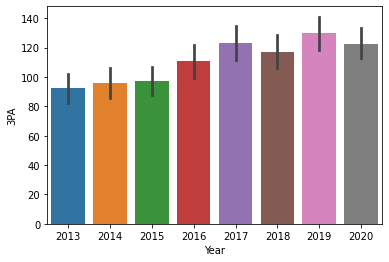

In [ ]:
sns.barplot(data = df, x='Year', y='3PA')

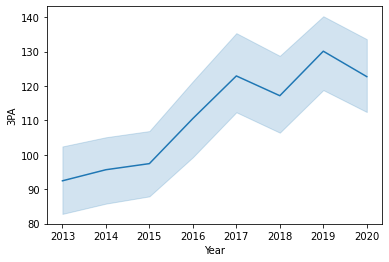

In [ ]:
sns.lineplot(data = df, x='Year', y='3PA')